### **TEMG 4940C - Machine Learning Assignment Guideline**

---



This document provides a guideline for completing a machine learning assignment. The assignment consists of 6 part, each corresponding to each steps with reference to Tutorial’s PPT:

*Remarks: There are no restrictions in terms of what specific libraries or programming language to use, so feel free to be creative or search online for inspirations.*


---




#### **Submission Criteria**
Your submission should include the following:
1. A public git repository with your machine learning code and a brief README file describing how to run it.
   
   a. README file should include the version of python & common libraries used during the development
   
   b. You are **STRONGLY RECOMMENDED** to comment your code, both for readability & to develop good collaboration habits in dev
   
   
2. A link to your deployed dashboard (if hosted)

---



**Name**: TONG, Tsun Man

**Student ID**: 20851819

#### **Dataset Introduction**
Customer personality analysis is a thorough examination of a company's ideal clients. It makes it simpler for businesses to adapt products in response to the unique wants, habits, and concerns of various consumer types.

Consumer personality analysis aids a corporation in tailoring its offering to its target market from various consumer categories. For instance, a firm can assess which customer segment is most likely to purchase the product and then promote the product exclusively to that specific segment rather than investing money to market a new product to every consumer in the database of the company.


---

**Attributes:**

*Part 1. People*
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise


*Part 2. Products*
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years


*Part 3.Promotion*
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


*Part 4. Place*
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

-------
**Ultimate Goal:**

With the Datasets aforementioned, evaluated the likelihood that customer would accepted offers in Marketing Campaign

**[Prediction Value]: Y =AcceptedCmp1 + AcceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + Response**

#### **Step 0. Loading the Data from File Path**
- Download the dataset from Canvas
- Undergo Preliminary Analysis



In [1]:
#Importing Relevant Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import scipy.stats as stats
import sklearn

In [2]:
#Loading the Dataset
data = pd.read_csv("TEMG4940C - Assignment Dataset.csv", sep="\t")
print("Number of datapoints:", len(data)) # Show number of Data Rows in Dataset
data.head(10) # Print Top 10 Rows of the dataset for preview

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [3]:
#Information on features
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000




---



> Q0. Generate Y - Predictor Value

In [4]:
#@title Q0. Generate Y - Predictor Value
## Before Proceeding, You may want to evaluate the Y -Predictor Value first
## By combining Y = AcceptedCmp1 + AcceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + Response

data['Y'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']

#### **Step 1. Exploratory Data Analysis**
In this step, you shall explore the data set and perform some descriptive statistics and visualizations to understand the data better. You shall also identify any potential problems or issues with the data, such as missing values, outliers, or imbalances.




> Q1a. In whichever preferred means (tables, graphs etcs), showcase the existence of missing value, outliers & imbalances in the dataset.

Missing Value in Dataset: 24


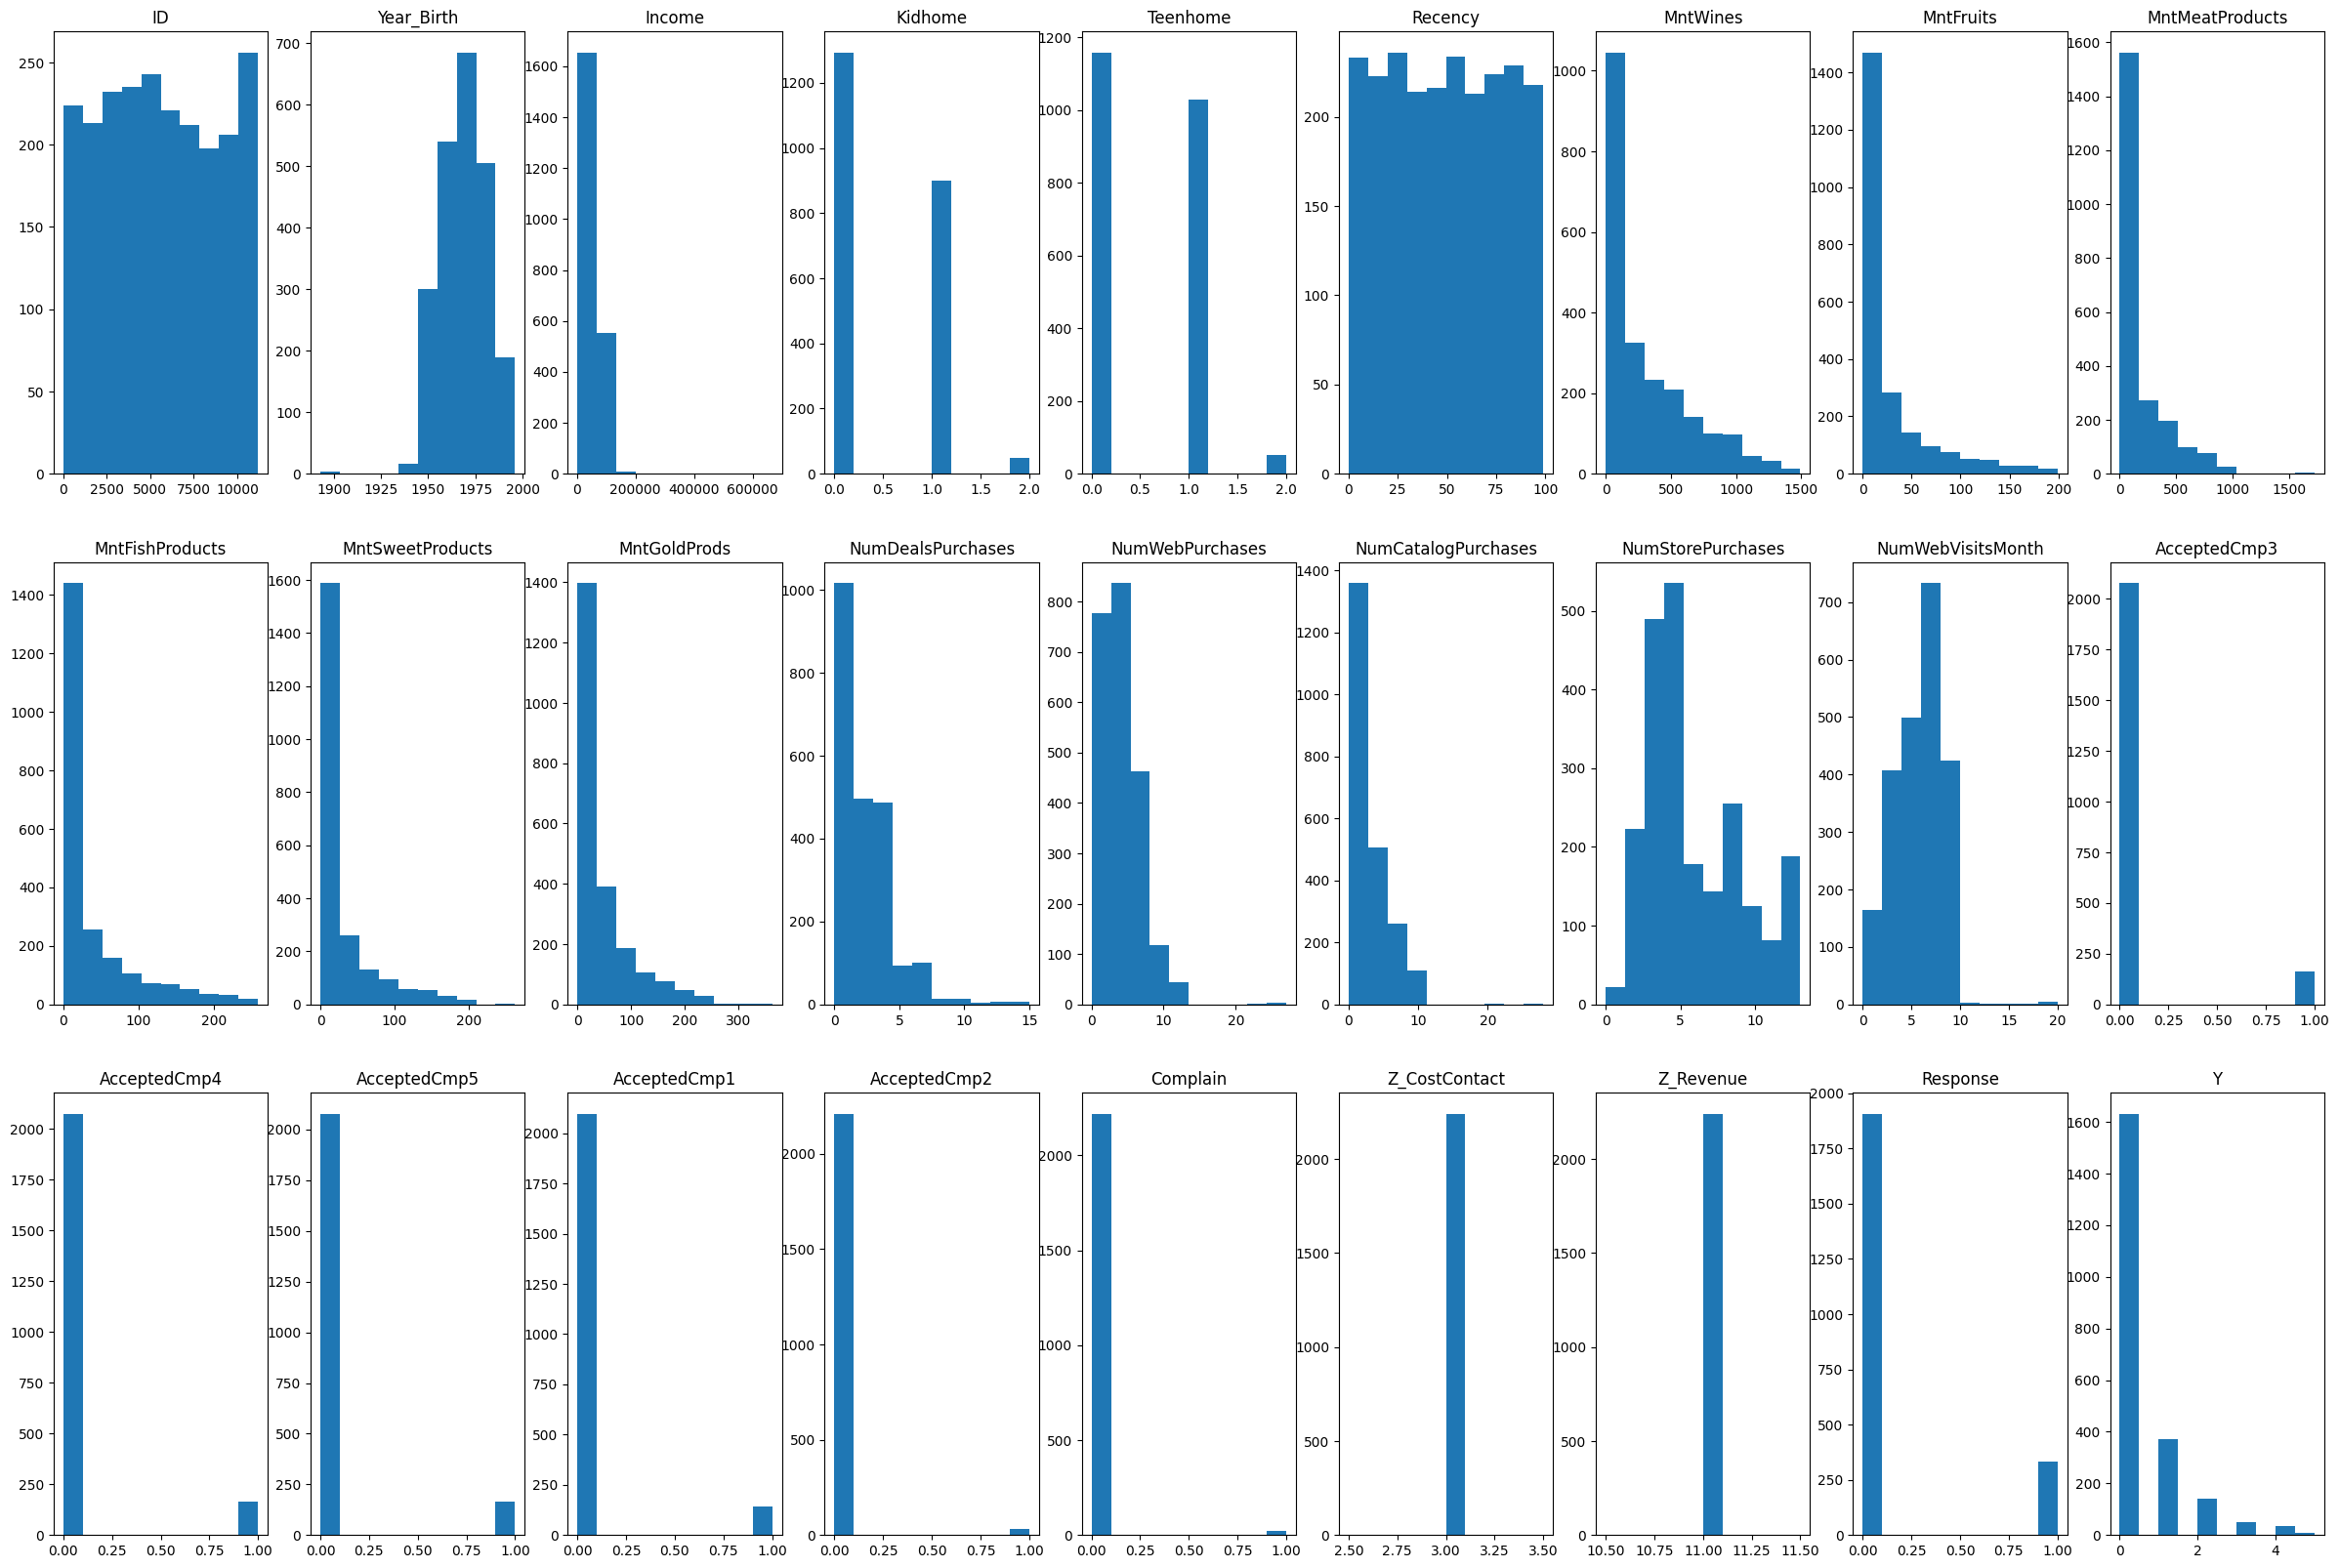

0    1631
1     370
2     142
3      51
4      36
5      10
Name: Y, dtype: int64

In [5]:
#@title Q1a. In whichever preferred means (tables, graphs etcs), showcase the existence of missing value, outliers & imbalances in the dataset.

# Q1a. Showcase existence of missing value, outliers & imbalances within dataset

# Missing Value
print("Missing Value in Dataset:", data.isnull().sum().sum())

# Outliers
fig, axs = plt.subplots(nrows=3, ncols=9, figsize=(30, 20))
axs = axs.flatten()
non_obj_columns = [col for col in data.columns if data[col].dtype != 'object']
for i, col in enumerate(non_obj_columns):
    axs[i].hist(data[col])
    axs[i].set_title(col)
plt.show()

# Imbalances
data['Y'].value_counts()

>  Q1b. Handle the missing values and outliers, and explain why was that particular methodology chosen.

In [6]:
#@title Q1b. Handle the missing values and outliers, and explain why was that particular methodology chosen.
# Q1b. Codes to handle (i) Missing Values, (ii) Outliers
# Tips: You may refer to Slide 19 in Tutorial PPT

data_altered = data.copy()

# (ii) Outliers
non_obj_columns = [col for col in data_altered.columns if data_altered[col].dtype != 'object']
for i, col in enumerate(non_obj_columns):
    q75, q25 = np.percentile(data_altered[col], [75, 25])
    iqr = q75 - q25
    min = q25 - (iqr * 1.5)
    max = q75 + (iqr * 1.5)
    data_altered.loc[data_altered[col] < min, col] = q25
    data_altered.loc[data_altered[col] > max, col] = q75

# (i) Missing Values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
non_obj_columns = [col for col in data_altered.columns if data_altered[col].dtype != 'object']
data_altered[non_obj_columns] = imputer.fit_transform(data_altered[non_obj_columns])

> Q1c. Explain why the above methodology to handle the missing values and outliers is chosen

**Answer:**

| | Methodology Used | Underlying Rationale |
|--|--|--|
|Handling Outliers | Feature Clipping | Quartile Bound is too discriminative towards data with larger standard deviation. Feature Clipping prevents the existance of outliers while maintaining the variety of data. |
|Handling Missing Values| KNN | It cna be used in all sorts of data including continuous, discrete, ordinal and categorical, and is a multidimensional evaluation instead of relying solely on mean/median |


>  Q1d. Plot 3 or more types of charts over all columns of data

In [7]:
#@title Q1d. Plot 3 or more types of charts over all columns of data
# Q1d. Exploratory Data Analysis Graph Plotting

# (i) Histogram
fig = make_subplots(rows=3, cols=10, subplot_titles=data_altered.columns, specs=[[{"type": "histogram"}]*10]*3)
for i in range(3):
    for j in range(10):
        col = data_altered.columns[i*10+j]
        fig.add_trace(
            go.Histogram(x=data_altered[col], name=col), row=i+1, col=j+1
        )
        fig.update_yaxes(title_text="Value", row=i+1, col=j+1)
fig.update_layout(height=1000, width=4000, showlegend=False)
fig.write_image("src/media/q1d_histograms.svg")
fig.show()

# (ii) Violinplot
fig = make_subplots(rows=3, cols=10, subplot_titles=data_altered.columns, specs=[[{"type": "violin"}]*10]*3)
for i in range(3):
    for j in range(10):
        col = data_altered.columns[i*10+j]
        fig.add_trace(
            go.Violin(y=data_altered[col], name=col), row=i+1, col=j+1
        )
        fig.update_yaxes(title_text="Value", row=i+1, col=j+1)
fig.update_layout(height=1000, width=4000, showlegend=False)
fig.write_image("src/media/q1d_violinplots.svg")
fig.show()


# # (iii) Boxplot
fig = make_subplots(rows=3, cols=10, subplot_titles=data_altered.columns, specs=[[{"type": "box"}]*10]*3)
for i in range(3):
    for j in range(10):
        col = data_altered.columns[i*10+j]
        fig.add_trace(
            go.Box(y=data_altered[col], name=col), row=i+1, col=j+1
        )
        fig.update_yaxes(title_text="Value", row=i+1, col=j+1)
fig.update_layout(height=1000, width=4000, showlegend=False)
fig.write_image("src/media/q1d_boxplots.svg")
fig.show()

> Q1e. Describe 3 observed patterns/ anomalies, and explain how would you plan/change your approach in upcoming data preparation/modeling based on the observations

**Answer:**

| | Pattern/Anomalies Observed | Respective Insights based on Observation |
|--|--|--|
| Pattern 1 | Some features still contain extreme outliers | Optimises certain features' outliers removal process |
| Pattern 2 | Some features' variety got greatly reduced | Be careful with the definition of outliers for certian features to maintain an appropriate level of variation |
| Pattern 3 | Pattern difference in continuous and discrete data | Use different data cleaning method for different types of data |




--------



#### **Step 2. Data Preparation**
In this step, you will prepare the data for modeling by applying appropriate techniques such as data cleaning, feature engineering, feature selection, and data transformation. You will also split the data into training and testing sets.

> Q2a. Identify Data Type of Each Column & Respective Data Preprocessing Methods
- **Type:** Nominal | Ordinal | Discrete | Continuous
- **Data Preprocessing Method:** One Hot Encoding | Rank Replacement | Normalization | Missing Data | Outlier | Feature Engineer | Data Balancing

**Answer:**

| Column | Data Type | Data Preprocessing |
|--|--|--|
ID                 | Discrete | Feature Selection |
Year_Birth         | Discrete | Outliers |      
Education          | Ordinal | Rank Replacement |       
Marital_Status     | Nominal | One Hot Encoding |
Income             | Continuous | Missing Data, Outliers |      
Kidhome            | Discrete | Data Balancing |        
Teenhome           | Discrete | Data Balancing |   
Dt_Customer        | Discrete | Feature Creation, Data Balancing |      
Recency            | Discrete | Outliers |     
MntWines           | Continuous | Outliers |    
MntFruits          | Continuous | Outliers |    
MntMeatProducts    | Continuous | Outliers |     
MntFishProducts    | Continuous | Outliers |    
MntSweetProducts   | Continuous | Outliers |    
MntGoldProds       | Continuous | Outliers |
NumDealsPurchases  | Discrete | Outliers |  
NumWebPurchases    | Discrete | Outliers |
NumCatalogPurchases| Discrete | Outliers |
NumStorePurchases  | Discrete | Outliers |  
NumWebVisitsMonth  | Discrete | Outliers |  
AcceptedCmp3       | Discrete | Data Balancing |  
AcceptedCmp4       | Discrete | Data Balancing |       
AcceptedCmp5       | Discrete | Data Balancing |       
AcceptedCmp1       | Discrete | Data Balancing |       
AcceptedCmp2       | Discrete | Data Balancing |       
Complain           | Discrete | Data Balancing |       
Z_CostContact      | Discrete | Feature Selection |
Z_Revenue          | Discrete | Feature Selection |
Response           | Discrete | Data Balancing |


>  Q2b. Perform the aforementioned Data Preprocessings

In [8]:
#@title Q2b. Perform the aforementioned Data Preprocessings
# Q2b. Preform Data Preprocessing

from sklearn.impute import KNNImputer
from imblearn.over_sampling import ADASYN

preprocessed = pd.read_csv("TEMG4940C - Assignment Dataset.csv", sep="\t")
preprocessed['Y'] = preprocessed['AcceptedCmp1'] + preprocessed['AcceptedCmp2'] + preprocessed['AcceptedCmp3'] + preprocessed['AcceptedCmp4'] + preprocessed['AcceptedCmp5'] + preprocessed['Response']
preprocessed['Y'] = preprocessed['Y'].astype('int64')
preprocessed.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'], axis=1, inplace=True)

# (i) Feature Selection
    # (a) Ignore Z_CostContact, Z_Revenue since they are constant
preprocessed.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

    # (b) Ignore ID since it is not a feature
preprocessed.drop(['ID'], axis=1, inplace=True)

# (ii) Feature Creation
preprocessed['Dt_Customer'] = pd.to_datetime(preprocessed['Dt_Customer'], format='%d-%m-%Y')
preprocessed['Dt_Customer'] = (pd.to_datetime('now') - preprocessed['Dt_Customer']).dt.days

# (iii) Rank Replacement
preprocessed['Education'] = preprocessed['Education'].replace({'Basic': 1, 'Graduation': 2, '2n Cycle': 3, 'Master': 4, 'PhD': 5})

# (iv) One-Hot Encoding
marital_status = preprocessed['Marital_Status'].unique()
preprocessed = pd.get_dummies(preprocessed, columns=['Marital_Status'])
for m in marital_status:
    preprocessed.rename(columns={'Marital_Status_' + m: m}, inplace=True)
    preprocessed[m] = preprocessed[m].astype('int64')

# (v) Handle Missing Values
imputer = KNNImputer(n_neighbors=3)
preprocessed['Income'] = imputer.fit_transform(preprocessed[['Income']])

# (vi) Handle Outliers
outliers_columns = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
for col in outliers_columns:
    q75, q25 = np.percentile(preprocessed[col], [75, 25])
    iqr = q75 - q25
    min = q25 - (iqr * 1.5)
    max = q75 + (iqr * 1.5)
    preprocessed.loc[preprocessed[col] < min, col] = q25
    preprocessed.loc[preprocessed[col] > max, col] = q75

# (vii) Data Balancing
X = preprocessed.drop(['Y'], axis=1)
y = preprocessed['Y']

adasyn = ADASYN(random_state=42)
X, y = adasyn.fit_resample(X, y)

<ipython-input-8-249cc6ce24ef>:21: FutureWarning:

The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()





---



#### **Step 3. Modeling**
In this step, you will choose and apply one or more machine learning algorithms to build predictive models using the training data.

>  Q3a. Generate Test/Training Data Split

In [9]:
#@title Q3a. Generate Test/Training Data Split
# Q3a. Generate Test / Training Data Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

> Q3b. Choose and deploy dataset to 3+ ML Model

In [10]:
#@title Q3b. Choose and deploy dataset to 3+ ML Model
# Q3b. Choose 3 models to deploy dataset to
# Tips: Do not afraid to test out various models, to find out which model fits the datasets the best

# Step 1. Import Model

# Step 2. Fit Dataframe into Model

# Step 3. Generate Model Prediction (Y)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# (i) K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_pred_proba = knn.predict_proba(X_test)

# (ii) Multi-Layer Perceptron
mlp = MLPClassifier(hidden_layer_sizes=(64, 32, 64), activation='relu', solver='adam', max_iter=100, early_stopping=True)
mlp.fit(X_train.values, y_train.values)
mlp_pred = mlp.predict(X_test.values)
mlp_pred_proba = mlp.predict_proba(X_test.values)

# (iii) Random Forest Classifier
rfr = RandomForestClassifier(random_state=42)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)
rfr_pred_proba = rfr.predict_proba(X_test)



---



#### **Step 4. Evaluation**
In this step, you will evaluate the performance of the models using various metrics and techniques, such as accuracy, precision, recall, F1-score, confusion matrix, ROC curve, etc. You will also compare the results of different models and select the best one.


> Q4a. Evaluate the models accuracy by calculating / plotting the following
1. Confusion Matrix
2. Accuracy Score, Recall Score, Precision Score, AUC Score & F1 Score
3. Plot the ROC Curve

In [12]:
#@title Q4a. Evaluate the Model's Accuracy
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay, roc_curve, roc_auc_score

# (i) Confusion Matrix
model_pred = [knn_pred, mlp_pred, rfr_pred]
model_name = ['KNN', 'Multi-Layer Perceptron', 'Random Forest']
for n in range(len(model_pred)):
    fig = px.imshow(confusion_matrix(y_test, model_pred[n]), labels=dict(x="Predicted", y="Actual", color="Count", ), x=['0', '1', '2', '3', '4', '5'], y=['0', '1', '2', '3', '4', '5'], text_auto=True, aspect='equal', origin='lower')
    fig.update_layout(title_text=f"{model_name[n]} Confusion Matrix", height=500, width=500)
    fig.write_image(f"src/media/q4a_{model_name[n]}_confusion_matrix.svg")
    fig.show()

# (ii) ROC Curve
model = [knn, mlp, rfr]
model_pred_proba = [knn_pred_proba, mlp_pred_proba, rfr_pred_proba]
for n in range(len(model)):
    y_oenhot = pd.get_dummies(y_test, columns=model[n].classes_)
    fig = go.Figure()
    fig.add_shape(type='line', line=dict(dash='dash'), x0=0, x1=1, y0=0, y1=1)
    for i in range(model_pred_proba[n].shape[1]):
        y_true = y_oenhot.iloc[:, i]
        y_score = model_pred_proba[n][:, i]
        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc_score = roc_auc_score(y_true, y_score)
        name = f'{y_oenhot.columns[i]} (AUC = {auc_score:.2f})'
        fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))
    fig.update_layout(xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        yaxis=dict(scaleanchor="x", scaleratio=1),
        xaxis=dict(constrain='domain'),
        width=650, height=500,
        title_text=f"{model_name[n]} ROC Curve"
    )
    fig.write_image(f"src/media/q4a_{model_name[n]}_roc_curve.svg")
    fig.show()

# (iii) Accuracy Score, Recall, Precision, F1-Score
for n in range(len(model)):
    report = classification_report(y_test, model_pred[n], output_dict=True, zero_division=0)
    values = [
        ['0', '1', '2', '3', '4', '5', 'Total'],
        ['-', '-', '-', '-', '-', '-', report['accuracy']],
        [report['0']['recall'], report['1']['recall'], report['2']['recall'], report['3']['recall'], report['4']['recall'], report['5']['recall'], report['macro avg']['recall']],
        [report['0']['precision'], report['1']['precision'], report['2']['precision'], report['3']['precision'], report['4']['precision'], report['5']['precision'], report['macro avg']['precision']],
        [report['0']['f1-score'], report['1']['f1-score'], report['2']['f1-score'], report['3']['f1-score'], report['4']['f1-score'], report['5']['f1-score'], report['macro avg']['f1-score']]
    ]
    values[1][6] = np.round(values[1][6], 3)
    for k in range(2, len(values)):
      values[k] = np.round(values[k], 3)

    fig = go.Figure(data=[go.Table(
        header=dict(values=['', 'Accuracy', 'Recall', 'Precision', 'F1-Score']),
        cells=dict(values=values)
    )])
    fig.update_layout(title_text=f"{model_name[n]} Classification Report", height=400, width=500)
    fig.write_image(f"src/media/q4a_{model_name[n]}_classification_report.svg")
    fig.show()

rf_accuracy = accuracy_score(y_test, rfr_pred)

> Q4b. After Evaluation, Please indicate which model would you eventually pursue & the underlying rationale

**Answer:**

I choose Model [Random Forest] because [it gives the most accurate results with 96% accuracy with the testing data]



---



#### **Step 5. Optimization**
In this step, you will try to improve the performance of the best model by applying some advanced techniques such as hyperparameter tuning, K-fold Cross Validation, ensemble methods, etc.

>  Q5a. Attempt Manual Hyperparameter Tuning & Observe how it affects the accuracy score

In [ ]:
#@title Q5a. Attempt Manual Hyperparameter Tuning & Observe how it affects the accuracy score

# Step 1. Head to the library that you sourced your pre-trained models from, and look at what hyperparameters are available for tuning

# Step 2. Try and Test out various combinations to observe the minor differences hyper-parameter tuning makes

# Step 3. Re-use the code in Part 4, to observe the changes in accuracy score

n_estimators = [50, 100, 200]
max_depth = [10, 20, 40]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 5]

accuracy_param_tuning = []
best_params = {}
score = 0

# Train the model on the smaller training set using different combinations of hyperparameters
for n in n_estimators:
    for d in max_depth:
        for s in min_samples_split:
            for l in min_samples_leaf:
                rf = RandomForestClassifier(n_estimators=n, max_depth=d, min_samples_split=s, min_samples_leaf=l, random_state=42)
                rf.fit(X_train, y_train)
                y_pred = rf.predict(X_test)
                accu = accuracy_score(y_test, y_pred)
                accuracy_param_tuning.append(accu)
                if accu > score:
                    score = accu
                    best_params = {'n_estimators': n, 'max_depth': d, 'min_samples_split': s, 'min_samples_leaf': l}
print('New tests:', accuracy_param_tuning)
print('Original Accuracy:', rf_accuracy)
print('New accuracy:', score)
print('Delta:', score - rf_accuracy)
print('Best Params:', best_params)

New tests: [0.9141696292534282, 0.9029964448958863, 0.8872524123920772, 0.9090909090909091, 0.9050279329608939, 0.8872524123920772, 0.9029964448958863, 0.9024885728796344, 0.8872524123920772, 0.9537836465210767, 0.9476891823260538, 0.9294057897409853, 0.94667343829355, 0.9456576942610462, 0.9294057897409853, 0.9456576942610462, 0.9471813103098019, 0.9294057897409853, 0.9532757745048248, 0.9532757745048248, 0.9319451498222447, 0.94667343829355, 0.9481970543423057, 0.9319451498222447, 0.9436262061960387, 0.9410868461147791, 0.9319451498222447, 0.9212798374809548, 0.9070594210259014, 0.8908075165058406, 0.9146775012696801, 0.9101066531234129, 0.8908075165058406, 0.9019807008633824, 0.9070594210259014, 0.8908075165058406, 0.9583544946673438, 0.9568308786185881, 0.9355002539360081, 0.9517521584560691, 0.9476891823260538, 0.9355002539360081, 0.9537836465210767, 0.9476891823260538, 0.9355002539360081, 0.9593702386998476, 0.9558151345860844, 0.9339766378872524, 0.9537836465210767, 0.9522600304

>  Q5b. Attempt K-fold Cross Validation to find the best Hyperparameter & Observe how it affects the accuracy score

In [ ]:
#@title Q5b. Attempt K-fold Cross Validation to find the best Hyperparameter & Observe how it affects the accuracy score

# Step 1. Import K-fold Cross Validation Libraries
# from sklearn.model_selection import cross_val_score

# Step 2. Generate Cross-validation grid containing various combination of hyper-parameter (Tips: Check Slide 48 in Tutorial PPT)

# Step 3. Re-use the code in Part 4, to observe the changes in accuracy score

from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

rf = RandomForestClassifier(random_state=42)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

best_rf = RandomForestClassifier(random_state=42, **grid_search.best_params_)
best_rf.fit(X_train, y_train)
accuracy = best_rf.score(X_test, y_test)
print("Accuracy Score: ", accuracy)

Best Hyperparameters:  {'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy Score:  0.9448949319152365
Accuracy Score:  0.9619095987811072


>  Q5c. Attempt one of the 3 ensemble methods & Observe how it affects the accuracy score

In [ ]:
#@title Q5c. Attempt one of the 3 ensemble methods & Observe how it affects the accuracy score

# Step 1. Import Relevant functions from Libraries
# e.g. from sklearn.ensemble import BaggingClassifier

# Step 2. Add ensembling methods on top of Base models

# Step 3. Re-use the code in Part 4, to observe the changes in accuracy score

# (a) Bagging Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)
bagging_pred = bagging.predict(X_test)
score = accuracy_score(y_test, bagging_pred)
print("Bagging:")
print("Accuracy Score: ", score)
print("Original Accuracy Score: ", rf_accuracy)
print("Delta: ", score - rf_accuracy)
print()

# (b) Boosting Classifier
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)
adaboost_pred = adaboost.predict(X_test)
score = accuracy_score(y_test, adaboost_pred)
print("AdaBoost:")
print("Accuracy Score: ", score)
print("Original Accuracy Score: ", rf_accuracy)
print("Delta: ", score - rf_accuracy)
print()

# (c) Stacking Classifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
KNC = KNeighborsClassifier(n_neighbors=5, weights='distance')
NB = GaussianNB()
lr = LogisticRegression()
clf_stack = StackingClassifier(estimators=[('knn', KNC), ('nb', NB), ('lr', lr)], final_estimator=RandomForestClassifier(random_state=42))
model_stack = clf_stack.fit(X_train, y_train)
stack_pred = model_stack.predict(X_test)
score = accuracy_score(y_test, stack_pred)
print("Stacking:")
print("Accuracy Score: ", score)
print("Original Accuracy Score: ", rf_accuracy)
print("Delta: ", score - rf_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Bagging:
Accuracy Score:  0.9395632300660234
Original Accuracy Score:  0.9593702386998476
Delta:  -0.01980700863382423



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



AdaBoost:
Accuracy Score:  0.92534281361097
Original Accuracy Score:  0.9593702386998476
Delta:  -0.03402742508887757



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

Stacking:
Accuracy Score:  0.8532249873031996
Original Accuracy Score:  0.9593702386998476
Delta:  -0.10614525139664799




---



#### **Step 6. Interpretation**
In this step, you will interpret the results of the best model and explain its predictions using some methods such as SHAP values, LIME, etc. You will also discuss the limitations and implications of the model and provide some recommendations for future work.

> Q6. Plot 3+ Graph that effectively explain insights that you uncovered about the trained model, comment to describe the insight that was uncovered.

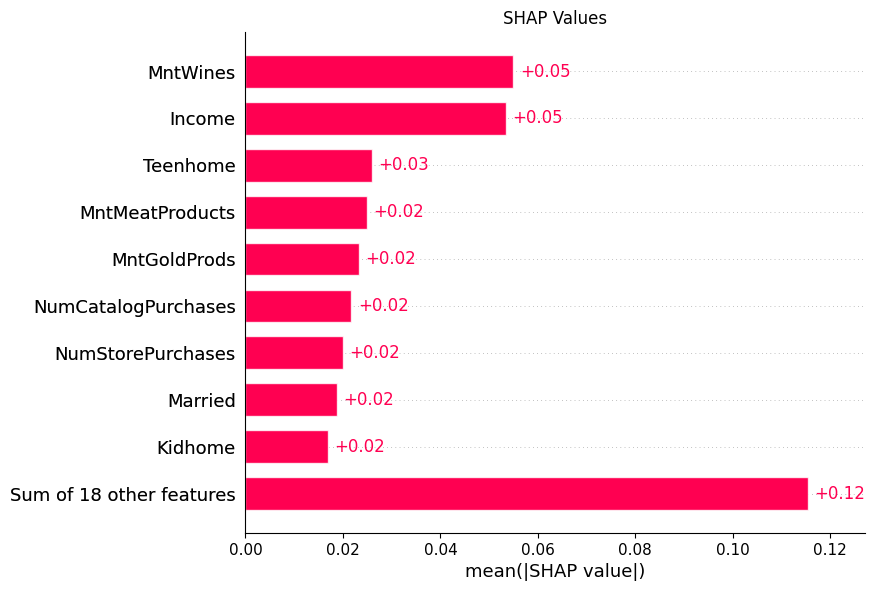

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


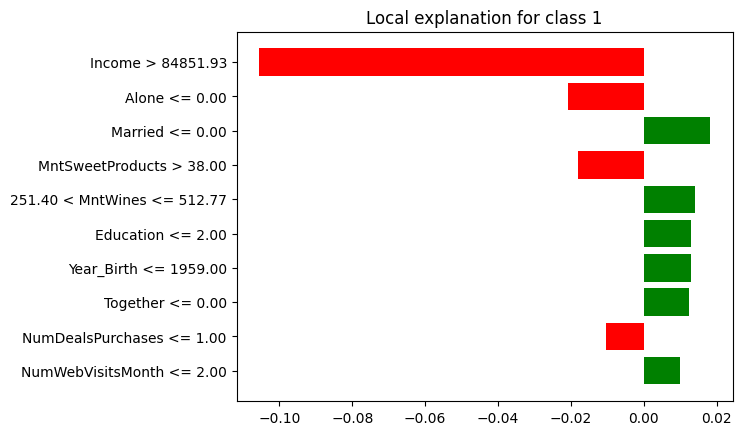

In [ ]:
#@title Q6. Plot 3+ Graph that effectively explain insights that you uncovered about the trained model, comment to describe the insight that was uncovered.

# Step 1. Import Graph Plotting Libraries (if any)
# ...
# plt.show()

# (a) Feature Importance
# The most important features comes from customers' shopping behaviours, such as their income, amount of money spent on wines, meat products, gold products, etc.
importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_], axis=0)
indices = np.argsort(importances)
fig = px.bar(x=importances[indices], y=X_train.columns[indices], error_y=std[indices], labels=dict(x="Importance", y="Feature"), orientation='h', text=np.round(importances[indices], 3))
fig.update_layout(title_text="Feature Importance", xaxis_title="Feature", yaxis_title="Importance", height=1000, width=500)
fig.write_image("src/media/q6_feature_importance.svg")
fig.show()

# (b) SHAP Values
# SHAP values are the average marginal contributions of each feature across all possible coalitions. The higher the SHAP value, the more important the feature is.
import shap
shap_explainer = shap.TreeExplainer(rfr)
shap_values = shap_explainer(X_train)
shap.plots.bar(shap_values[:,:,0].abs.mean(0), show=False)
plt.title("SHAP Values")
plt.savefig("src/media/q6_shap.svg")
plt.show()

# (c) LIME
# LIME is a local surrogate model that explains the predictions of any classifier in an interpretable and faithful manner, by learning an interpretable model locally around the prediction.
import lime
import lime.lime_tabular
lime_explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['0', '1', '2', '3', '4', '5'], discretize_continuous=True)
exp = lime_explainer.explain_instance(X_test.values.mean(0), rfr.predict_proba, num_features=10)
exp.as_pyplot_figure()
plt.title("LIME Values")
plt.savefig("src/media/q6_lime.svg")
plt.show()



---



#### **Step 7. Machine Learning Dashboard**
In this section of the assignment, you will showcase your findings and insights from your Machine Learning project by building an interactive and visually appealing dashboard.


Transform Graphs that you generated in
1. Part 1d - Exploratory Data Analysis
2. Part 4a - Model's Evaluation
3. Part 6 - Model's Insight Generation

into a web-based dashboard.

(For reference - Dashboard Example: https://explainerdashboard.readthedocs.io/en/latest/)

